# Tarea 3 Reconocimiento de Patrones
## Juan Carlos Perez Ramirez

## 2. ¿Cual metodo es mas robusto a datos atipicos: k-medias o agrupamiento aglomerativo? ¿De que depende?
Integra en tu respuesta algunos ejemplos didacticos apoyados con unas
graficas informativas.

El agrupamiento aglomerativo es mas robusto, puesto que, al agrupar las observaciones segun su cercania entre si, los outliers se mantienen separados del resto de grupos formados sin afectarlos durante buena parte del agrupamiento. En adicion a esto, la eleccion de la distancia empleada puede mejorar los resultados, como en el uso del *complete linkage*, que une grupos segun la distancia entre los dos elementos mas distantes entre los dos grupos asegurando que todos los elementos del cluster se encuentran por debajo de esta distancia maxima, y reduciendo asi el error producido por los outliers.

Por su parte, dado que k-medias asigna todos los elementos a algun grupo desde el inicio y busca minimizar las varianzas de estos respecto a su centroide, la presencia de los outliers afectara los resultados obtenidos. A continuacion se muestra como la presencia de outliers afecta los centroides de los grupos en k-means.

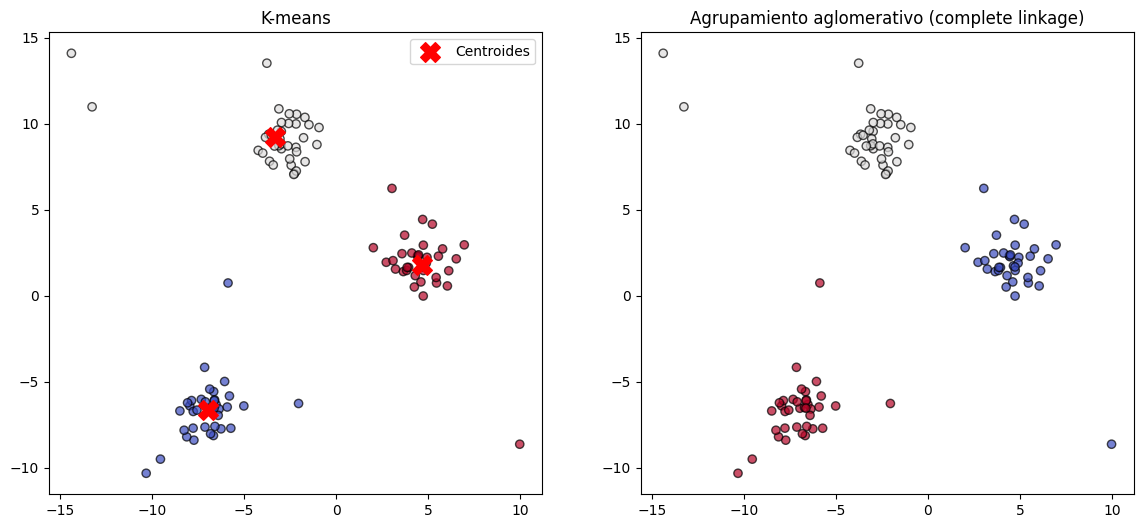

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs

n = 3

np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-15, high=15, size=(10, 2))
X = np.vstack([X, outliers])

# K-Means
kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)

# Agrupamiento aglomerativo con complete linkage
agglo = AgglomerativeClustering(n_clusters=n, linkage="complete")
labels_agglo = agglo.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='coolwarm', edgecolors='k', alpha=0.7)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroides")
axes[0].set_title("K-means")
axes[0].legend()

axes[1].scatter(X[:, 0], X[:, 1], c=labels_agglo, cmap='coolwarm', edgecolors='k', alpha=0.7)
axes[1].set_title("Agrupamiento aglomerativo (complete linkage)")

plt.show()

## 3. Supongamos que en agrupamiento jerarquico aplicamos una funcion monotona creciente a las distancias entre las observaciones que usamos como punto de partida. Por ejemplo, usamos $d^2_{i,j}$ en lugar de $d_{i,j}$.
Discute: ¿van a cambiar los resultados de single, average y complete linkage?

Los resultados cambiaran porque, a pesar de que la funcion mantiene el orden de las distancias, si se emplea una funcion que no es lineal las diferencias relativas entre las mediciones cambiaran, de manera que la metrica para los diferentes grupos aumentara o se reducira, afectando su agrupamiento

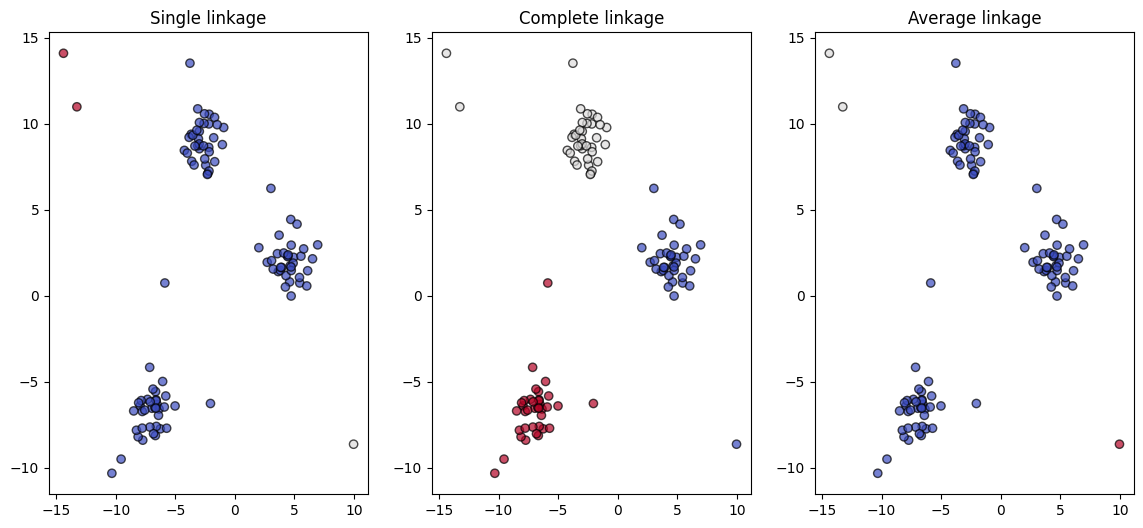

In [88]:
from sklearn.metrics.pairwise import euclidean_distances

n = 3

# Calcular la matriz de distancias al cuadrado
dist_matrix = np.square(euclidean_distances(X, X))


agglo_single = AgglomerativeClustering(n_clusters=n, metric='precomputed', linkage='single')
labels_single = agglo_single.fit_predict(dist_matrix)

agglo_complete = AgglomerativeClustering(n_clusters=n, metric='precomputed', linkage='complete')
labels_complete = agglo_complete.fit_predict(dist_matrix)

agglo_avg = AgglomerativeClustering(n_clusters=n, metric='precomputed', linkage='average')
labels_avg = agglo_avg.fit_predict(dist_matrix)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=labels_single, cmap='coolwarm', edgecolors='k', alpha=0.7)
axes[0].set_title("Single linkage")

axes[1].scatter(X[:, 0], X[:, 1], c=labels_complete, cmap='coolwarm', edgecolors='k', alpha=0.7)
axes[1].set_title("Complete linkage")

axes[2].scatter(X[:, 0], X[:, 1], c=labels_avg, cmap='coolwarm', edgecolors='k', alpha=0.7)
axes[2].set_title("Average linkage")

plt.show()

# 6. Haz un analisis de agrupamiento para los datos sat.csv.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv("../Datos/sat.csv").drop(columns="Unnamed: 0")
df.head()

,gender,education,age,ACT,SATV,SATQ
0,2,3,19,24,500,500.0
1,2,3,23,35,600,500.0
2,2,3,20,21,480,470.0
3,1,4,27,26,550,520.0
4,1,2,33,31,600,550.0


In [98]:
df.isna().sum()

gender        0
education     0
age           0
ACT           0
SATV          0
SATQ         13
dtype: int64

In [99]:
df = df.dropna()

Se decide usar PCA para reducir la dimensionalidad del dataset

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

In [124]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Varianza explicada por cada componente: [0.37161976 0.26154673]


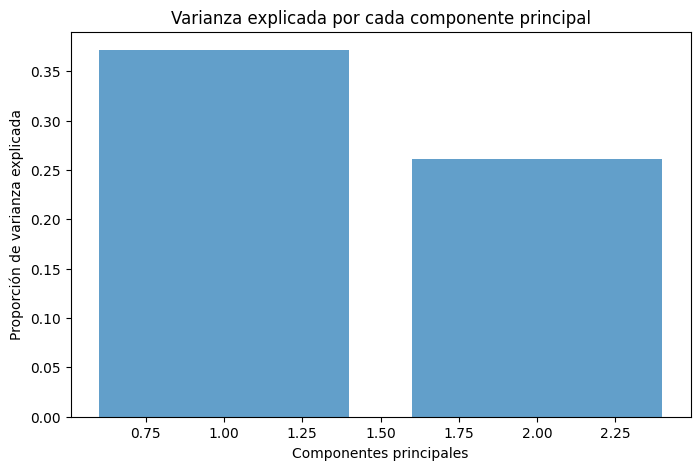

In [125]:
# Proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)

# Gráfico de varianza explicada
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Varianza explicada por cada componente')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()

In [126]:
X_pca

array([[ 1.7836678 , -0.23275833],
       [-0.02580715,  0.02268669],
       [ 2.37290706, -0.12021113],
       ...,
       [-0.71547583, -0.21961545],
       [-1.97733974,  0.6155244 ],
       [ 0.21892609,  0.66619352]])

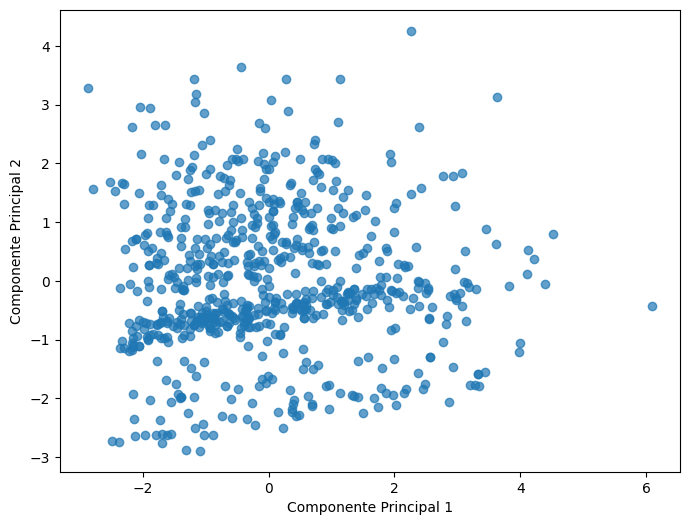

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


Se realiza el analisis primero por agrupamiento aglomerativo y luego por k-means

## Agrupamiento aglomerativo

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Al analizar el dendograma, se observa que el agrupamiento optimo es para 3 clusters

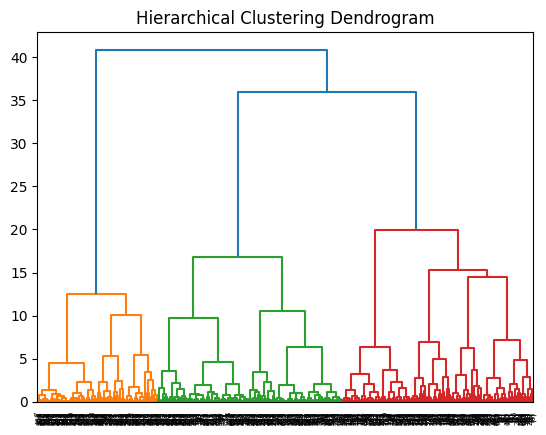

In [127]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_pca)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)

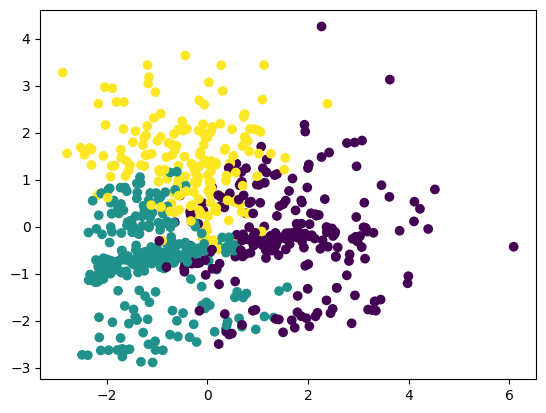

In [128]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels_agg = hierarchical_cluster.fit_predict(X)

plt.scatter(X_pca[:,0],X_pca[:,1], c=labels_agg)
plt.show()

## K-Means

In [81]:
from sklearn.cluster import KMeans

Como en el caso anterior, se observa que el agrupamiento optimo es de alrededor de 3 clusters

/home/juancho/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/juancho/.local/lib/pyt

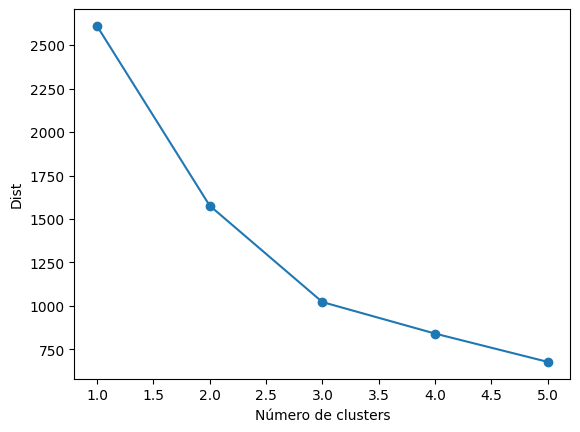

In [129]:
dist=[]
for i in range(1, 6):
  km = KMeans(n_clusters=i)
  km.fit(X_pca)
  dist.append(km.inertia_)

plt.plot(range(1, 6), dist, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Dist')
plt.show()

/home/juancho/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


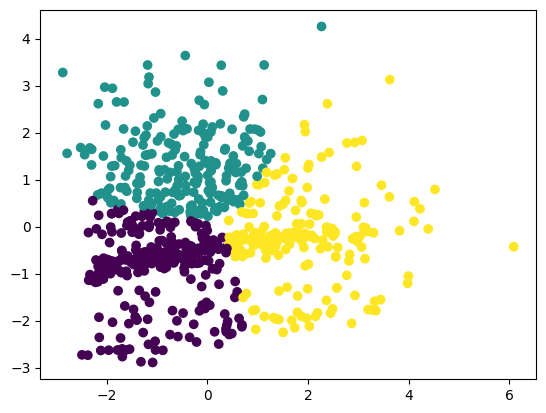

In [130]:
kmeans = KMeans(n_clusters=3)
labels_kmn = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmn)
plt.show()

## Comparacion

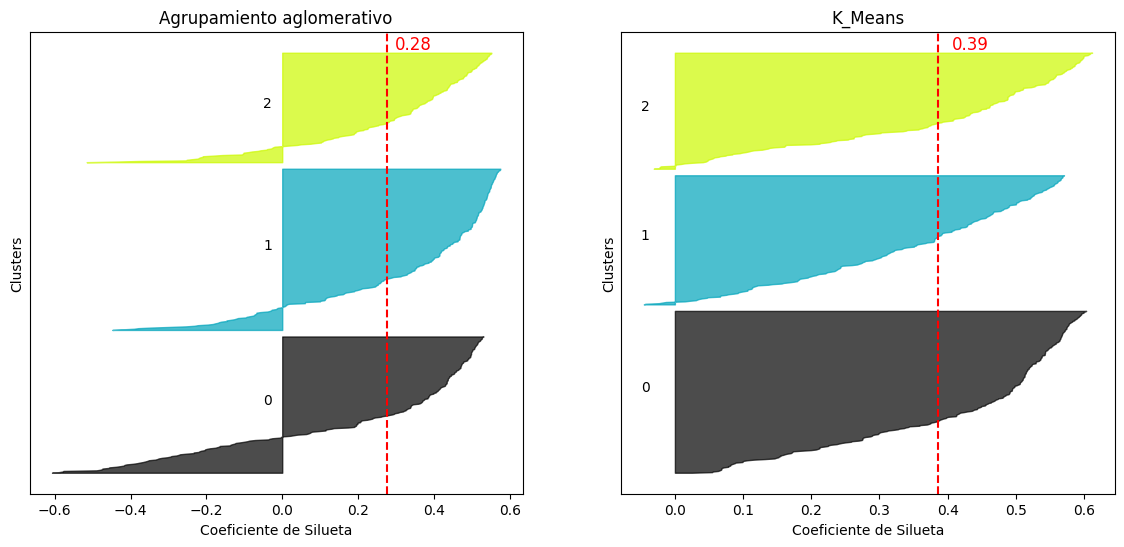

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

n_clusters = 3

# Agrupamiento aglomerativo

# Calculamos los coeficientes de silueta
silhouette_avg_agg = silhouette_score(X_pca, labels_agg)
sample_silhouette_values_agg = silhouette_samples(X_pca, labels_agg)

# Creamos la figura del Silhouette Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_lower = 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values_agg[np.where(labels_agg == i)[0]]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    axes[0].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    axes[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axes[0].set_title(f"Agrupamiento aglomerativo")
axes[0].set_xlabel("Coeficiente de Silueta")
axes[0].set_ylabel("Clusters")
axes[0].axvline(x=silhouette_avg_agg, color="red", linestyle="--")
axes[0].text(silhouette_avg_agg + 0.02, y_lower - 5, f"{silhouette_avg_agg:.2f}", color="red", fontsize=12)
axes[0].set_yticks([])


# K-Means

# Calculamos los coeficientes de silueta
silhouette_avg_kmn = silhouette_score(X_pca, labels_kmn)
sample_silhouette_values_kmn = silhouette_samples(X_pca, labels_kmn)

y_lower = 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values_kmn[np.where(labels_kmn == i)[0]]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    axes[1].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    axes[1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axes[1].set_title(f"K_Means")
axes[1].set_xlabel("Coeficiente de Silueta")
axes[1].set_ylabel("Clusters")
axes[1].axvline(x=silhouette_avg_kmn, color="red", linestyle="--")
axes[1].text(silhouette_avg_kmn + 0.02, y_lower - 5, f"{silhouette_avg_kmn:.2f}", color="red", fontsize=12)
axes[1].set_yticks([])

plt.show()


La linea roja indica el coeficiente de silueta promedio, de donde se observa que k-means tiene un coeficiente de silueta mayor que el agrupamiento aglomerativo, indicando que produce agrupaciones mejor definidas, si bien los resultados de ambos son moderadamente buenos.

La presencia de valores negativos indica que hay datos asignados al grupo incorrecto, o en el borde entre un par de bordes. Esto, sumado al relativamente bajo desempeno de ambos metodos, indican que los datos no poseen separaciones tan claras (como se observa a simple vista en el grafico de dispersion).